<a href="https://colab.research.google.com/github/Saetbyeol-Choi/R_Report/blob/main/Project1_Manufacturing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 1 - Manufacturing**

## **Bike performance analysis for hilly San Francisco**

## 1. Objective of the Proposed Research 

> The two-wheeled vehicle market in India continues to grow. Indian bike manufacturers want to lead the revival of the manufacturing business by raising their image of brand through bold investment and global market entry. Among them there is an emerging manufacturer("Eksca Corporation") looking to enter San Francisco.<br>
<br>
With an increasing influx of Indian population, Eksca Corporation is targeting them to enter the bike market in San Francisco. The city is currently experiencing increasing congestion and inconvenience to find a parking space. A bike has an advantage in that they can be freely parked even in a narrow spaces. San Francisco is also known for its hills. While the bicycle road is well organized, there are some restrictions on going up and down the steep and sloping hills by bicycle.<br>
<br>
Based on the data set, we would like to predict what kind of performance of bike needs to be manufactured for hilly San Francisco. And we would like to provide this information to the Eksca Corporation who is seeking to enter global market.<br>
<br>
The data is provided by [Kaggle.](https://www.kaggle.com/datasets/mohanraj7/bikes-specifications)

## 2. Data Exploration

In [ ]:
# Load data set
data <- read.csv("/content/Manufacturing dataset_bike.csv")
d_data <- read.csv("/content/Bike_data.csv")

In [ ]:
# Extract only necessary columns
bike <- data[,c(2,6,7,9,10,15)]
b_bike <- d_data[c(20,21)]
bike <- cbind(bike, b_bike)

### 1. Showing rows from 23 to 30

In [ ]:
bike[23:30,]

,company_name,Maximum.Power,Maximum.Torque,Bore,Stroke,X0.100.kmph,Wheelbase,Kerb.Wet.Weight
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
23,Ampere,250W,NaN,NaN,NaN,NaN,NaN,NaN
24,Aprilia,125 Bhp @ 8250 rpm,115 Nm @ 6800 rpm,106 mm,67.8 mm,NaN,1565.00 mm,214.00 kg
25,Aprilia,128.7 Bhp @ 8700 rpm,115 Nm @ 7200 rpm,106 mm,67.8 mm,NaN,1528 mm,NaN
26,Aprilia,75 Bhp @ 8000 rpm,73 Nm @ 5000 rpm,88 mm,69 mm,NaN,1463 mm,NaN
27,Aprilia,181.4 Bhp @ 12500 rpm,117 Nm @ 10000 rpm,78 mm,52.3 mm,NaN,NaN,179 kg
28,Aprilia,93.6 Bhp @ 9000 rpm,81 Nm @ 7000 rpm,92 mm,56.4 mm,NaN,1440 mm,NaN
29,Aprilia,10.06 HP @ 6750 rpm,10.90 NM @ 5000 rpm,NaN,NaN,NaN,NaN,122 kg
30,Aprilia,18 HP @ 9750 rpm,14 NM @ 7500 rpm,63.6 mm,47.0 mm,NaN,1345 mm,140 kg


### 2. Showing the number of rows and columns

In [ ]:
dim(bike)

[1] 771   8

### 3. Showing the structure of data frame

In [ ]:
str(bike)

'data.frame':	771 obs. of  8 variables:
 $ company_name   : chr  "Accura" "Accura" "Accura" "Adventure Wheels" ...
 $ Maximum.Power  : chr  "20AH" "NaN" "20AH" "9 Bhp @ 8500 rpm" ...
 $ Maximum.Torque : chr  "NaN" "NaN" "NaN" "NaN" ...
 $ Bore           : chr  "NaN" "NaN" "NaN" "54 mm" ...
 $ Stroke         : chr  "NaN" "NaN" "NaN" "54 mm" ...
 $ X0.100.kmph    : chr  "NaN" "NaN" "NaN" "NaN" ...
 $ Wheelbase      : chr  "NaN" "NaN" "NaN" "1250.00 mm" ...
 $ Kerb.Wet.Weight: chr  "75.00 kg" "NaN" "75.00 kg" "81.00 kg" ...


### 4. Showing the counted number of manufacturers by name

In [ ]:
library(dplyr)

In [ ]:
company <- bike %>% filter(is.na(company_name) == FALSE) %>% group_by(company_name) %>% count(company_name)
head(arrange(company,desc(n)),10)

company_name,n
<chr>,<int>
Honda,76
Yamaha,69
TVS,41
Bajaj,38
Hero,31
Suzuki,31
Royal Enfield,28
Ducati,24
Hero Electric,18


## 3. Data Cleaning

> Change the column structure to numeric. Create a new data frame and remove missing values.



In [ ]:
Maximum_power <- as.numeric(gsub(".*?([0-9]+).*","\\1", bike$Maximum.Power))
Maximum_power <- data.frame(Maximum_power)

In [ ]:
Maximum_torque <- as.numeric(gsub(".*?([0-9]+).*","\\1", bike$Maximum.Torque))
Maximum_torque <- data.frame(Maximum_torque)

In [ ]:
Bore <- as.numeric(gsub(".*?([0-9.]+).*","\\1", bike$Bore))
Bore <- data.frame(Bore)

In [ ]:
Stroke <- as.numeric(gsub(".*?([0-9.]+).*","\\1", bike$Stroke))
Stroke <- data.frame(Stroke)

In [ ]:
Time <- as.numeric(gsub(".*?([0-9.]+).*","\\1", bike$X0.100.kmph))
Time <- data.frame(Time)

In [ ]:
Company_name <- bike$company_name

In [ ]:
Wheel_base <- as.numeric(gsub(".*?([0-9]+).*","\\1", bike$Wheelbase))
Wheel_base <- data.frame(Wheel_base)
Weight <- as.numeric(gsub(".*?([0-9]+).*","\\1", bike$Kerb.Wet.Weight))
Weight <- data.frame(Weight)
bike2 <- cbind(Company_name,Maximum_power,Maximum_torque,Bore,Stroke,Time,Wheel_base,Weight)

In [ ]:
bike3 <- na.omit(bike2)
head(bike3,10)

,Company_name,Maximum_power,Maximum_torque,Bore,Stroke,Time,Wheel_base,Weight
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
49,Bajaj,20,18,67.0,62.4,10.50,1350,155
50,Bajaj,24,18,72.0,49.0,10.28,1363,156
51,Bajaj,24,18,72.0,49.0,9.92,1345,166
73,Bajaj,20,18,67.0,62.4,10.50,1350,150
74,Bajaj,23,18,72.0,49.0,10.50,1363,153
84,Benelli,28,21,61.2,72.0,10.73,1400,159
100,BMW,33,28,80.0,62.1,7.50,1374,158
104,BMW,173,140,80.0,64.3,2.81,1585,243
137,Ducati,159,130,106.0,67.9,2.50,1590,234


## 4. Adaptation

> Add 3 new columns to the newly created data frame above. 



In [ ]:
# Find the value of engine capacity with bore and stroke values.
Engine_capacity <- round(0.7854*((bike3[,4])*(bike3[,4])*(bike3[,5])/1000),digits=2)
Engine_capacity <- matrix(Engine_capacity)

# Get the maximum horsepower value based on the engine capacity.
Maximum_hp <- round(Engine_capacity/32.2, digits=2)
Maximum_hp <- matrix(Maximum_hp)

# Acceleration is calculated using 0-100 km/h values.
Acceleration <- round((100*3600)/bike3$Time)

final_bike <- cbind(bike3, Engine_capacity, Maximum_hp, Acceleration)
head(final_bike,10)

,Company_name,Maximum_power,Maximum_torque,Bore,Stroke,Time,Wheel_base,Weight,Engine_capacity,Maximum_hp,Acceleration
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
49,Bajaj,20,18,67.0,62.4,10.50,1350,155,220.00,6.83,34286
50,Bajaj,24,18,72.0,49.0,10.28,1363,156,199.50,6.20,35019
51,Bajaj,24,18,72.0,49.0,9.92,1345,166,199.50,6.20,36290
73,Bajaj,20,18,67.0,62.4,10.50,1350,150,220.00,6.83,34286
74,Bajaj,23,18,72.0,49.0,10.50,1363,153,199.50,6.20,34286
84,Benelli,28,21,61.2,72.0,10.73,1400,159,211.80,6.58,33551
100,BMW,33,28,80.0,62.1,7.50,1374,158,312.15,9.69,48000
104,BMW,173,140,80.0,64.3,2.81,1585,243,323.21,10.04,128114
137,Ducati,159,130,106.0,67.9,2.50,1590,234,599.20,18.61,144000


## 5. Descriptive Visualization

### 1. Correlation between horsepower and maximum power

> Maximum power refers to the maximum output that a bike can produce. To examine the relationship between horsepower and maximum power from the data, draw a graph with horsepower on the x-axix and maximum power on the y-axis. Use the "geom_point()" function to display a scatterplot and the "geom_smooth()" function to draw a smooth line to find out the trend and correlation of two variables. The gray area is the 95% confidence interval of the trend line. Themes such as grid and color arrangement can be set with the "theme()" function provided by ggplot2, and the axis and graph title can be set by the "lab()" function.<br>
<br>
It can be seen that the two variables are generally positively correlated, but not completely in direct proportion. The higher the horsepower, the better the engine output, the better the acceletation, but at the same time, it can be considered that the output may be affected by other factors as well.

In [ ]:
# Install packages for ggplot
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



`geom_smooth()` using method = 'loess' and formula 'y ~ x'



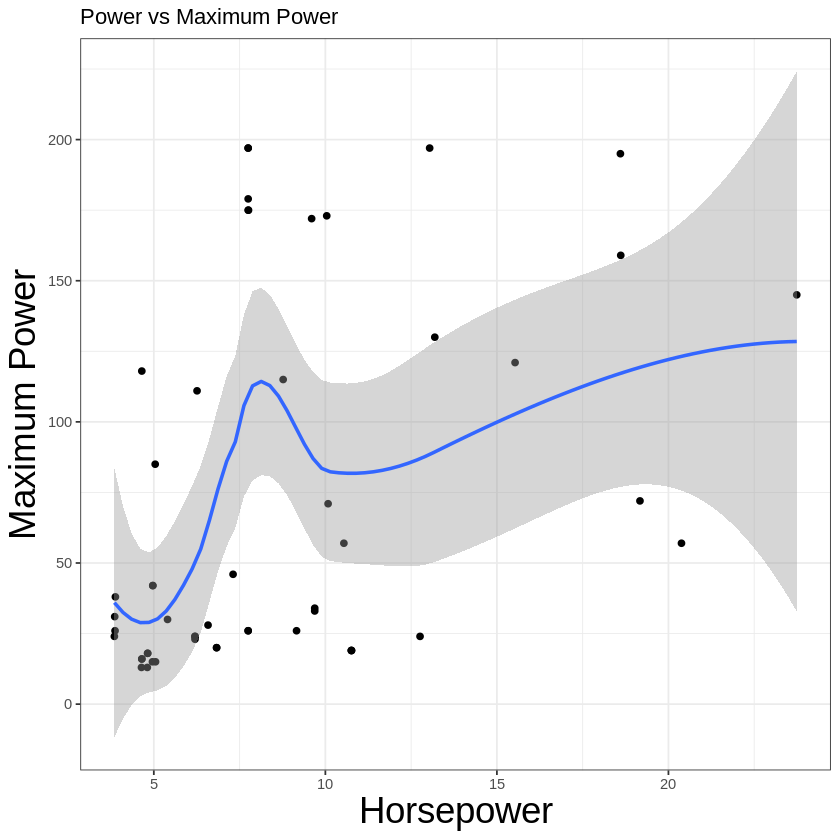

In [ ]:
ggplot(data = final_bike, aes(x = Maximum_hp, y = Maximum_power)) +
geom_point() +
geom_smooth() +
theme_bw() +
theme(axis.title = element_text(size=rel(2))) +
labs(title= "Power vs Maximum Power", x = "Horsepower", y = "Maximum Power")

### 2. Correlation between maximum power and engine capacity


> Dots are expressed in different colors depending on the manufacturer and a legend is automatically created for which color corresponds to which manufacturer.<br>
<br>
Generally, there is a positive correlation, with Suzuki having the highest engine capacity and Yamaha and Ducati having the highest maximum power.

In [ ]:
library(tidyverse)
defaultW <- getOption("warn")
options(warn=-1)

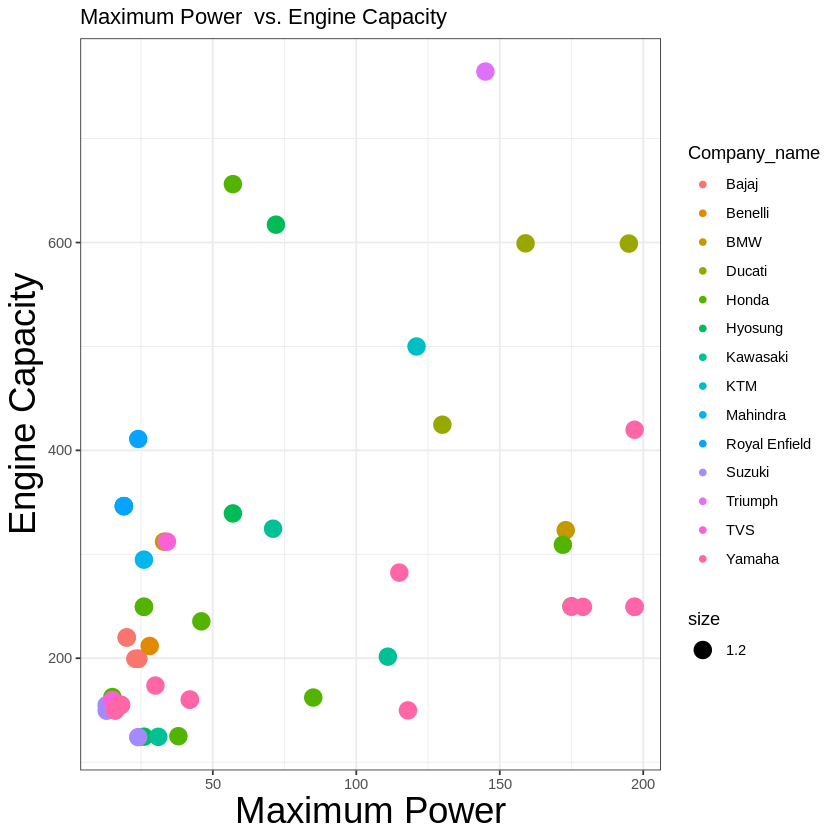

In [ ]:
ggplot(data = final_bike) +
geom_point(mapping = aes(x = Maximum_power, y = Engine_capacity, color=Company_name, size=1.2)) +
theme_bw() +
theme(axis.title = element_text(size=rel(2))) +
labs(title= "Maximum Power  vs. Engine Capacity", x = "Maximum Power", y = "Engine Capacity")

### 3. Correlation between maximum power and engine capacity

> The boxplot shows the distribution of enigne capacity for the bike companies. Some of the dustributions are very low in values which means their manufacturing bikes having almost similar engine capacity i.e cc-cubic centimeters. Some other companies like Honda,Hyosung, kawasaki etc have a quite good distribution ranges, so that we can find upper quartile, upper whisker, lower quartile and lower whisker.

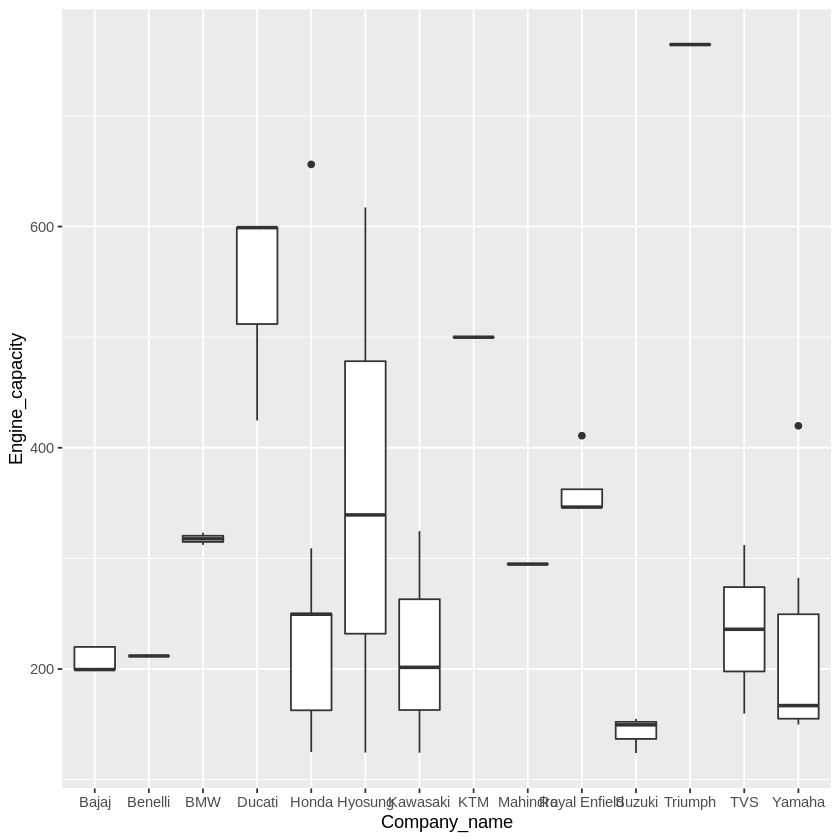

In [ ]:
ggplot(data = final_bike, mapping = aes(x = Company_name, y = Engine_capacity)) +
    geom_boxplot()

### 4. Acceleration based on the manufacturer
> Compare the acceleration force by manufacturer with a density distribution plot. "Zero to hundred(0-100)" is an indicator of initial acceleration force. It refers to the time it takes to reach 100 km/h from a standstill. Excellent value can also be interpreted as meaning that the maximum output and maximum torque are high, and the overall acceleration performance of the vehicle is good. Most manufacturers find that the time from standstill to 100km/h is around 20 seconds.  



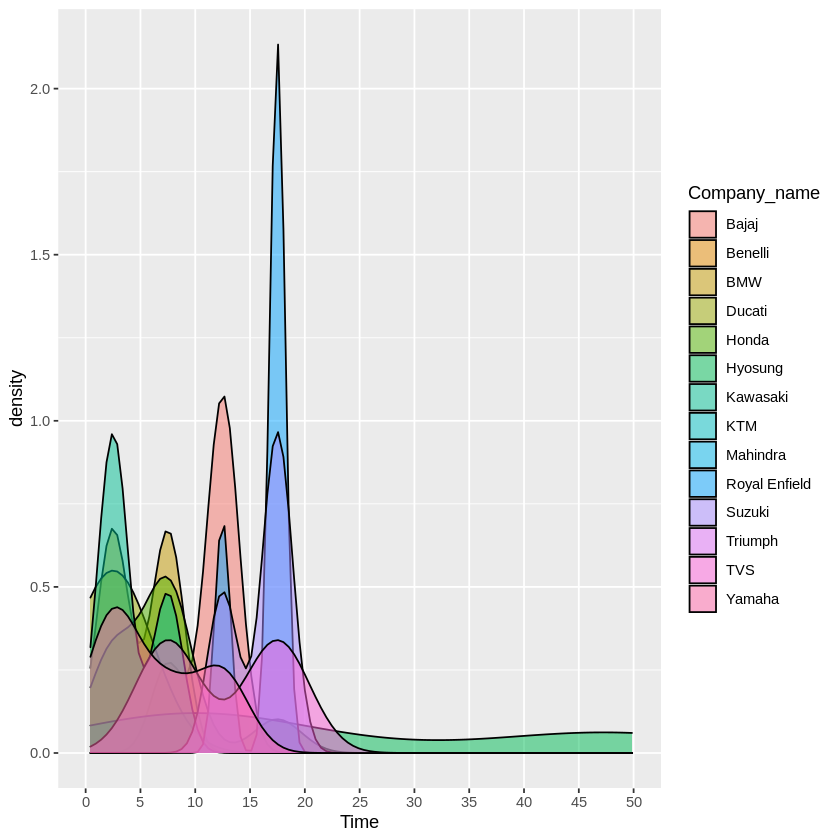

In [ ]:
ggplot(final_bike, aes(x=Time, fill=Company_name)) +
scale_x_binned(limits = c(0,50)) +
geom_density(alpha=0.5, scale=1)
defaultW <- getOption("warn")
options(warn=-1)

## 6. Explore Correlations

> In this exploratory correlations we mainly focused on the Torque.
From the first plot we can see Maximum torque vs Maximum power shows us the power is related to torque as the torque increases the power of bike increases so we can say that at maximum torque the bike has the maximum power as well in most of the cases.<br>
<br>
The second plot shows the correlation between maximum torque and engine capacity. It is difficult to see that the two variables are correlated with each other, as the torque with the high value in the plot is distributed to both the high and low values of the engine capacity. In conclusion, it can be seen that the they are proportional but have a weak linear relationship.<br>
<br>
The last one shows the correlation between the torque and the time it takes to get from 0 to 100kmph. In the plot the relationship is found that as time is the multiplicative inverse of torque. This means that the time decreases as the torque increases, which is useful when climbing steep hills.
 

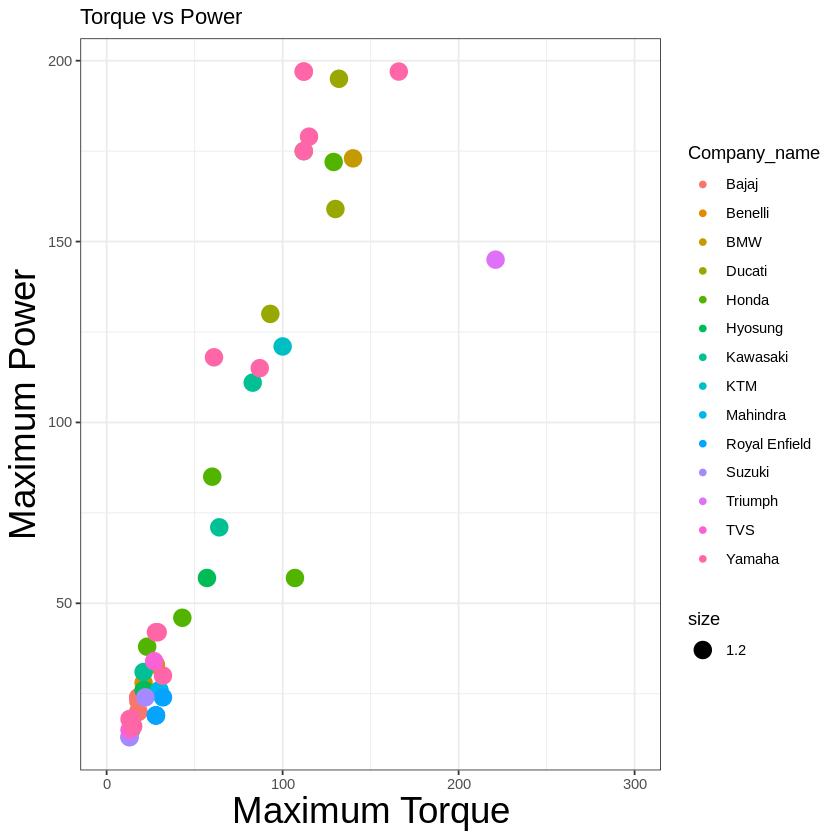

In [ ]:
ggplot(data = final_bike) +
geom_point(mapping = aes(x = Maximum_torque, y = Maximum_power, color=Company_name, size=1.2)) +
  coord_cartesian(xlim = c(0,300)) +
theme_bw() +
theme(axis.title = element_text(size=rel(2))) +
labs(title= "Torque vs Power", x = "Maximum Torque", y = "Maximum Power")

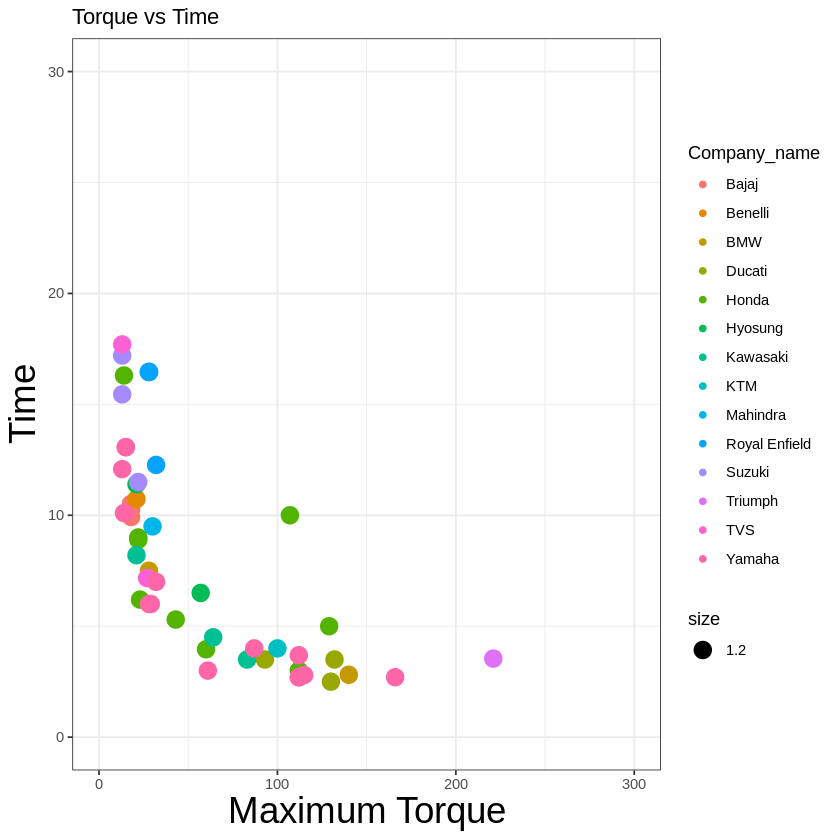

In [ ]:
ggplot(data = final_bike) +
geom_point(mapping = aes(x = Maximum_torque, y = Time, color=Company_name, size=1.2)) +
  coord_cartesian(xlim = c(0,300), ylim = c(0,30)) +
theme_bw() +
theme(axis.title = element_text(size=rel(2))) +
labs(title= "Torque vs Time", x = "Maximum Torque", y = "Time")

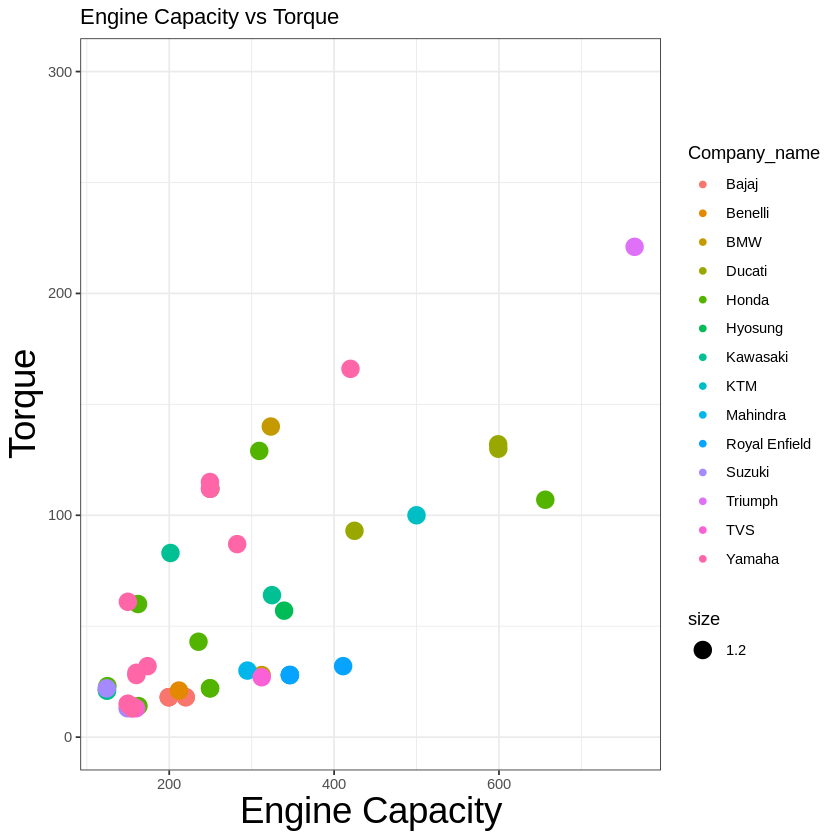

In [ ]:
ggplot(data = final_bike) +
geom_point(mapping = aes(x = Engine_capacity, y = Maximum_torque, color=Company_name, size=1.2)) +
  coord_cartesian(ylim = c(0,300)) +
theme_bw() +
theme(axis.title = element_text(size=rel(2))) +
labs(title= "Engine Capacity vs Torque", x = "Engine Capacity", y = "Torque")

## 7. Response Variable

> Exploratory correlations found a relationship between torque, power and time to reach 0-100kmph. Since power and time to reach 0-100kmph are quantitatively correlated with torque, the numerical continuous response variable is maximum torque. Power refers to the bike's ability to climb seep hills, and the time it takes to reach 0-100kmph explains that if the distance between the bike and the steep hill is minimal, the bike takes less time to reach that speed, making it easier for the bike to climb steep hills. In the end, the response variable will be the torque related to power and the time to reach 0-100kmph, an important fatcors to consider for climbing steep hills.<br>
<br>
The coefficient of determination of the multiple regression linear model with torque as the dependent variables and power and time as independent variables is 0.9914, indicating that the variables are highly correlated.<br>
<br>
In conclusion, we would like to find a bike suitable for hilly terrain based on the fact that the higher the torque, the better the climbing ability.

In [ ]:
model <- lm(final_bike$Maximum_torque~ final_bike$Maximum_power + final_bike$Time, data = final_bike)
summary(model)


Call:
lm(formula = final_bike$Maximum_torque ~ final_bike$Maximum_power + 
    final_bike$Time, data = final_bike)

Residuals:
    Min      1Q  Median      3Q     Max 
-257.24  -73.08   20.10   74.36  176.18 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -482.2607    25.3143  -19.05  < 2e-16 ***
final_bike$Maximum_power    2.9814     0.2522   11.82 5.88e-16 ***
final_bike$Time            39.9878     0.5217   76.64  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 115.1 on 49 degrees of freedom
Multiple R-squared:  0.9917,	Adjusted R-squared:  0.9914 
F-statistic:  2942 on 2 and 49 DF,  p-value: < 2.2e-16


## 8. Simple Linear Regression


> Create a linear regression model by using the "lm()" function. A linear regression model is visualized as graph with the "plot()" function. Set the graph title and the titles for each of the x-axis and y-axis. A regression line is indicated by using "abline()", and its color is red. View the result of the regression analysis with the "summary()" function and interpret them. 

### 1. Engine Capacity vs Power

> Since the significance probability is 0.00159, the regression model is statistically valid at the significance level of 0.05. That is, the engine appears to have a statistically significant effect on power. Coefficient of determination indicates the explanation power of the regression model, that is, the explanation power of the independent variale. The power of explanation of this regression model is 18.24%. An increase of 1 in the engine capacity has the effect of increasing the power by 0.18195.


Call:
lm(formula = final_bike$Maximum_power ~ final_bike$Engine_capacity, 
    data = final_bike)

Residuals:
   Min     1Q Median     3Q    Max 
-82.20 -36.05 -22.98  33.61 131.79 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)   
(Intercept)                19.80950   17.23798   1.149  0.25595   
final_bike$Engine_capacity  0.18195    0.05447   3.340  0.00159 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 58.74 on 50 degrees of freedom
Multiple R-squared:  0.1824,	Adjusted R-squared:  0.1661 
F-statistic: 11.16 on 1 and 50 DF,  p-value: 0.001588


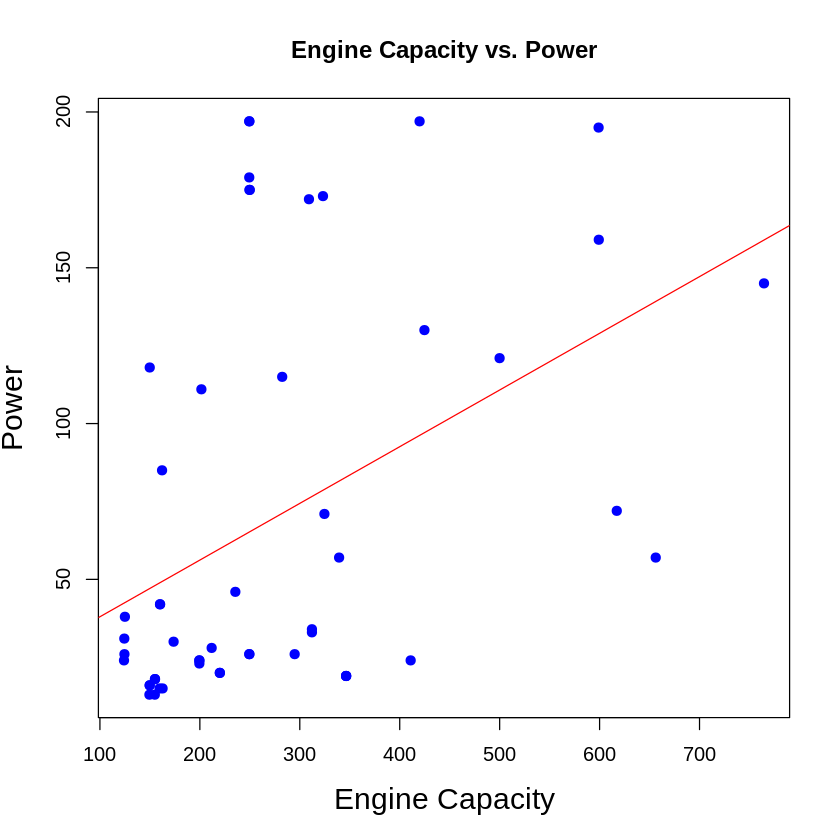

In [ ]:
lm1 <- lm(final_bike$Maximum_power ~ final_bike$Engine_capacity, data=final_bike)
summary(lm1)
p1 <- plot(final_bike$Engine_capacity, final_bike$Maximum_power, pch=19, col="blue", main="Engine Capacity vs. Power", xlab = "Engine Capacity", ylab = "Power", cex.lab="1.5"); abline(lm1, col="red")

### 2. Maximum Power vs Acceleration

> Since the significance probability is 0.0000, the regression model is statistically valid at the significance level of 0.05. Therefore, the independent variable appears to have a statistically significant effect on the dependent variable. When power increases by 1, acceleration increases by 553.9. The independent variable, power, explains the difference in acceleration, which is the dependent variable, by about 83.2%.


Call:
lm(formula = final_bike$Acceleration ~ final_bike$Maximum_power, 
    data = final_bike)

Residuals:
   Min     1Q Median     3Q    Max 
-60676  -5452    848   7643  33570 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)               22360.1     3345.6   6.684 1.88e-08 ***
final_bike$Maximum_power    553.9       35.2  15.738  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16170 on 50 degrees of freedom
Multiple R-squared:  0.832,	Adjusted R-squared:  0.8287 
F-statistic: 247.7 on 1 and 50 DF,  p-value: < 2.2e-16


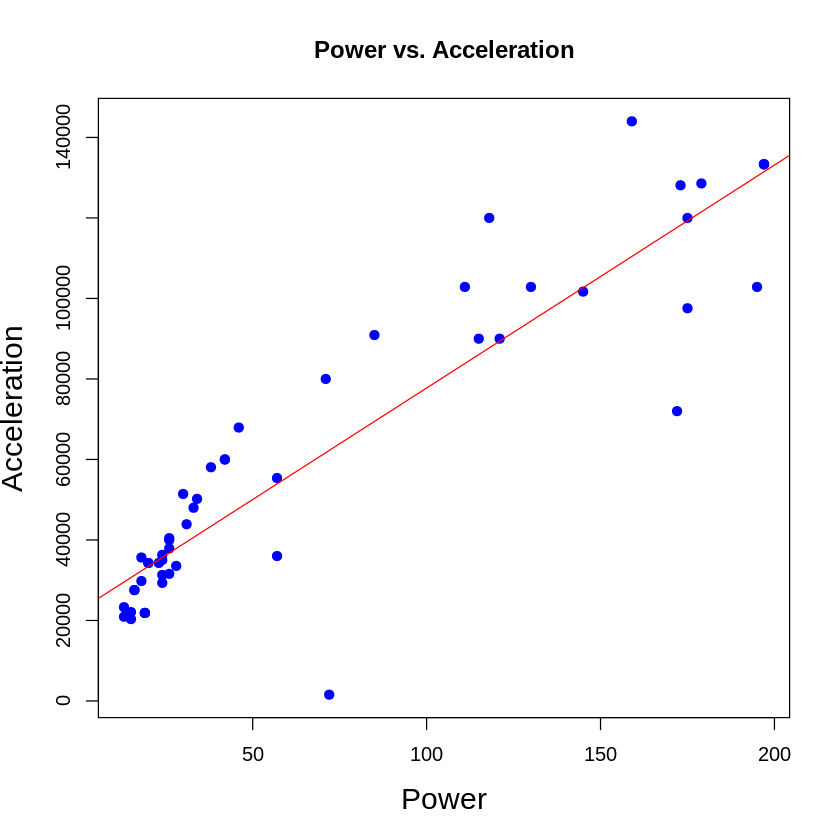

In [ ]:
lm2 <- lm(final_bike$Acceleration ~ final_bike$Maximum_power, data=final_bike)
summary(lm2)
p1 <- plot(final_bike$Maximum_power, final_bike$Acceleration, pch=19, col="blue", main="Power vs. Acceleration", xlab = "Power", ylab = "Acceleration", cex.lab="1.5"); abline(lm2, col="red")

### 3. Engine Capacity vs Acceleration
> The significance probability is slightly greater than 0.05. In the regression model, the independent variable does not affect the dependent variable in significance. If there are independent variables that are not significant in the regression model, it is more preferable to interpret them as adjusted R-squared. When interpreted with the modified coefficient of determination, it can be seen that the independent variable explains 5.33% of the dependent variable which shows the explanation power of this model is very low.


Call:
lm(formula = final_bike$Acceleration ~ final_bike$Engine_capacity, 
    data = final_bike)

Residuals:
   Min     1Q Median     3Q    Max 
-83333 -23591 -14642  21494  73931 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                42102.30   11153.14   3.775 0.000426 ***
final_bike$Engine_capacity    69.34      35.24   1.968 0.054683 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 38000 on 50 degrees of freedom
Multiple R-squared:  0.07186,	Adjusted R-squared:  0.0533 
F-statistic: 3.871 on 1 and 50 DF,  p-value: 0.05468


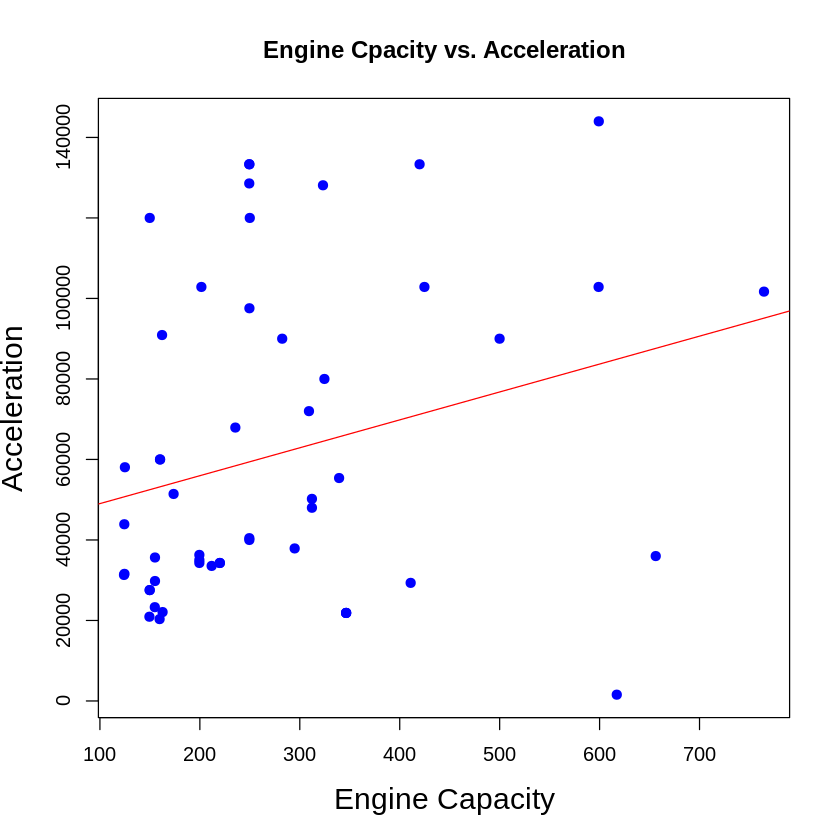

In [ ]:
lm3 <- lm(final_bike$Acceleration ~ final_bike$Engine_capacity, data=final_bike)
summary(lm3)
p1 <- plot(final_bike$Engine_capacity, final_bike$Acceleration, pch=19, col="blue", main="Engine Cpacity vs. Acceleration", xlab = "Engine Capacity", ylab = "Acceleration", cex.lab="1.5"); abline(lm3, col="red")

### 4. Bore vs Horsepower
> Based on the p-value, the regression model is statistically valid. When the bore increases by 1mm, the horsepower increases by 0.14491. The coefficient of determination of the model is 0.5372, which has an explanation power of 53.72% of this model.


Call:
lm(formula = final_bike$Maximum_hp ~ final_bike$Bore, data = final_bike)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.6186 -1.5664 -0.8964  0.5887 11.3839 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -2.36656    1.51497  -1.562    0.125    
final_bike$Bore  0.14491    0.01902   7.619 6.49e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.222 on 50 degrees of freedom
Multiple R-squared:  0.5372,	Adjusted R-squared:  0.528 
F-statistic: 58.04 on 1 and 50 DF,  p-value: 6.493e-10


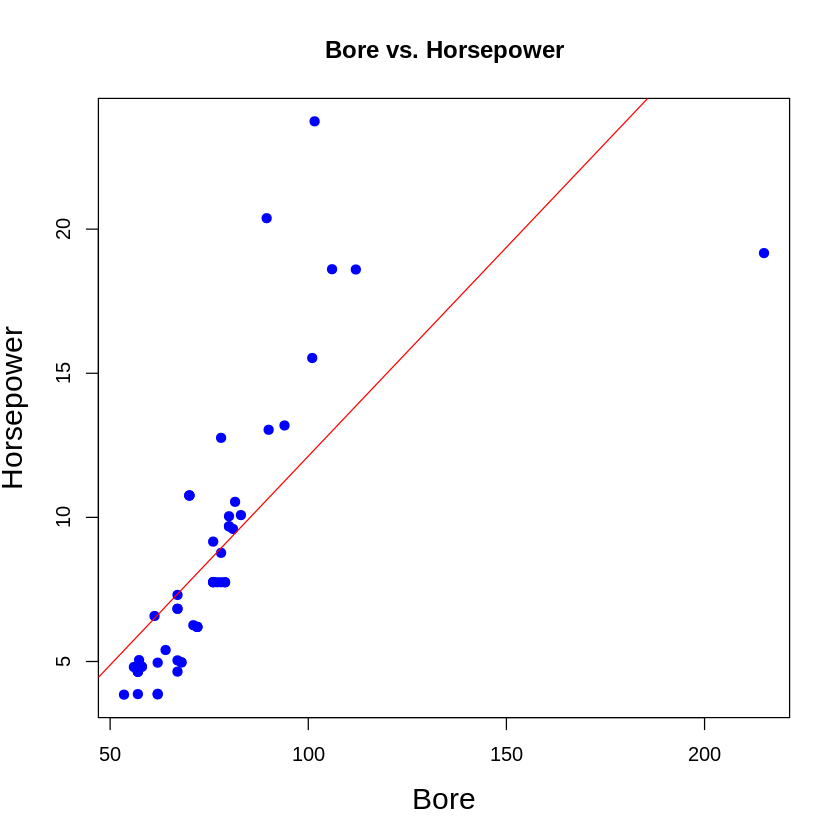

In [ ]:
lm4 <- lm(final_bike$Maximum_hp ~ final_bike$Bore, data=final_bike)
summary(lm4)
p1 <- plot(final_bike$Bore, final_bike$Maximum_hp, pch=19, col="blue", main="Bore vs. Horsepower", xlab = "Bore", ylab = "Horsepower", cex.lab="1.5"); abline(lm4, col="red")

### 5. Stroke vs Horsepower
> If the p-value is lower than 0.05, the regression model is valid. Therefore, it appears that the dependent variable is statistically significantly affected by the independent variable. When the stroke increases by 1mm, the horsepower increases by 0.14635. The independent variable, storke explains the difference in horsepower, which is the dependent variable, by about 21.97%. 


Call:
lm(formula = final_bike$Maximum_hp ~ final_bike$Stroke, data = final_bike)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3010 -2.3307 -0.8768  0.6960 16.7762 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.09412    2.40487  -0.039 0.968936    
final_bike$Stroke  0.14635    0.03901   3.752 0.000457 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.184 on 50 degrees of freedom
Multiple R-squared:  0.2197,	Adjusted R-squared:  0.2041 
F-statistic: 14.08 on 1 and 50 DF,  p-value: 0.0004574


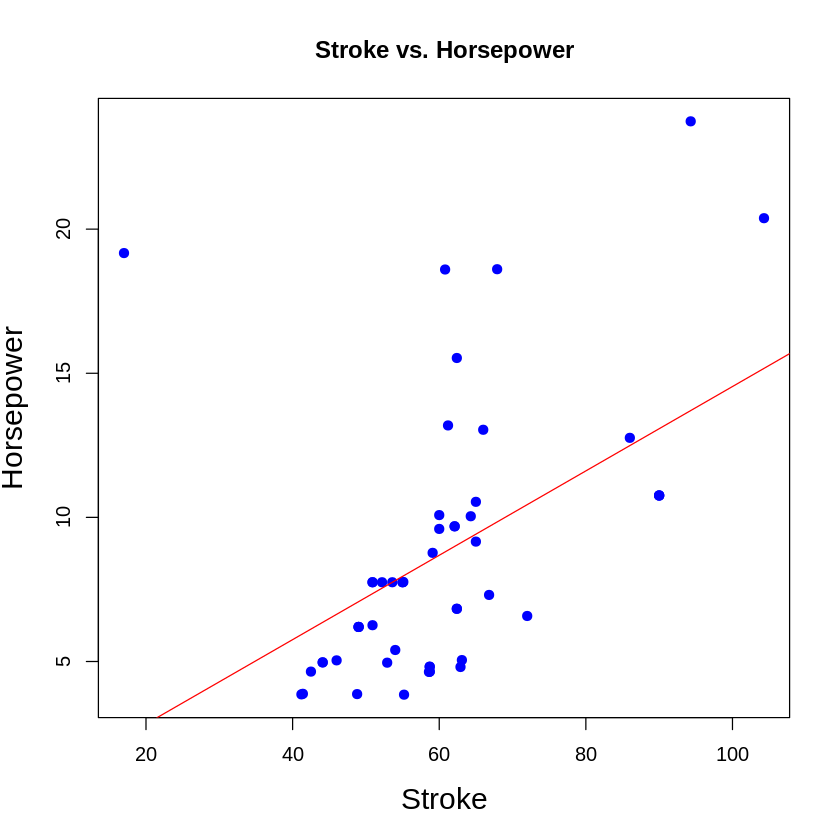

In [ ]:
lm5 <- lm(final_bike$Maximum_hp ~ final_bike$Stroke, data=final_bike)
summary(lm5)
p1 <- plot(final_bike$Stroke, final_bike$Maximum_hp, pch=19, col="blue", main="Stroke vs. Horsepower", xlab = "Stroke", ylab = "Horsepower", cex.lab="1.5"); abline(lm5, col="red")


#### Comparison result of simple linear regression
> Based on the p-value, coefficient value, and coeffinient of determination, the results of the regression analysis "lm()" function were interpreted. Of theses, an optimal linear regression model is extracted based on the R-squared used for testing the regression equation. The coefficient of determination means the ratio of the variance of the dependent variable predicted from the independent variable. The closer to 1, the higher the power of explanation of the regression coefficient. Except for the model comparing engine capacity and acceleration, the remaining models have significant regression coefficients and regression equations. Among them, the linear regression equation with the largest coefficient of determination is a model that compares maximum power and acceleration. The change in acceleration according to the change in power is explained by about 83.2%, and it can be said that it is the best model among those five models.

## 9. Multiple Linear Regression
> Regression analysis is performed with the "lm()" function. For multiple linear regression, one dependent variable and two or more independent variables are set. 
Check the result of regression analysis with the "summary()" function and interpre it.

### 1. Bore & Stroke vs Horesepower

> Since both variables have a significance probability of 0.00, the regression model is valid at the significance level of 0.05. When the bore is fixed, when the stroke increases by 1mm, the dependent variable horsepower increases by about 0.191. When the stroke is fixed, if the bore increases by 1mm, the horsepower increases by about 0.166. When interpreted with the adjusted coefficient of determination, the two independent varaiables explain the difference of the dependent variable by 89.73%. 

In [ ]:
model1 <- lm(final_bike$Maximum_hp~ final_bike$Bore + final_bike$Stroke, data = final_bike)
summary(model1)


Call:
lm(formula = final_bike$Maximum_hp ~ final_bike$Bore + final_bike$Stroke, 
    data = final_bike)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3127 -0.6264  0.0254  0.4957  4.2630 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -15.389616   1.199042  -12.84   <2e-16 ***
final_bike$Bore     0.165681   0.009006   18.40   <2e-16 ***
final_bike$Stroke   0.191235   0.014224   13.45   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.503 on 49 degrees of freedom
Multiple R-squared:  0.9013,	Adjusted R-squared:  0.8973 
F-statistic: 223.7 on 2 and 49 DF,  p-value: < 2.2e-16


### 2. Engine Capacity & Acceleration vs Maximum Power


> Based on the p-values of the two independent variables, the regression model is statistically valid. Power is affected by engine and acceleration. If the base unit of acceleration increases by 1 when the engine capacity is fixed, the power increases by about 1.42. When the engine capacity increases by 1 when the acceleration is fixed, the power increases by about 8.38. The adjusted R-squared is 0.8626, which has an explanation power of 86.26% of the model. 

In [ ]:
model2 <- lm(final_bike$Maximum_power ~ final_bike$Engine_capacity + final_bike$Acceleration, data = final_bike)
summary(model2)


Call:
lm(formula = final_bike$Maximum_power ~ final_bike$Engine_capacity + 
    final_bike$Acceleration, data = final_bike)

Residuals:
    Min      1Q  Median      3Q     Max 
-55.245 -12.429  -2.487   9.275  83.963 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -3.978e+01  7.932e+00  -5.014 7.36e-06 ***
final_bike$Engine_capacity  8.381e-02  2.295e-02   3.652 0.000633 ***
final_bike$Acceleration     1.415e-03  8.873e-05  15.950  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23.84 on 49 degrees of freedom
Multiple R-squared:  0.868,	Adjusted R-squared:  0.8626 
F-statistic: 161.1 on 2 and 49 DF,  p-value: < 2.2e-16


#### Comparison result of multiple linear regression
> The coefficient of determination has a characteristic that increases as the number of independent variables increases. Therefore, in the case of multiple linear regression, the explanation power of the regression model is measured with the adjusted R-squared. Both models have significant regression coefficients and regression equations, and the first model with a larger value in the adjusted coefficient of determination can be interpreted as the better model.<br>
<br>
When bore and storke were compared with horsepower respectively, the explanation power of the independent variable for the dependent variabe was approximately 53.72% and 21.97%. When bore and stroke were set as two independent variables for horsepower as one dependent variable, the coefficient of determination was greatly increased to 89.73%. Similarly, when engine capacity and acceleration were compared with the maximum power, the coefficients of determination were 18.24% and 83.2%, repectively. When engine capacity and acceleration were set as two independent variables and power was set as one dependent variable, the coefficient of determination of the model was about 86.3%.<br>
Compared with simple linear regression, it can be confirmed that the coefficient of determination is increased as the variable is added, and acordingly, it can be confirmed that the multiple linear regression model has higher power of explanation.

## 10. Project Report

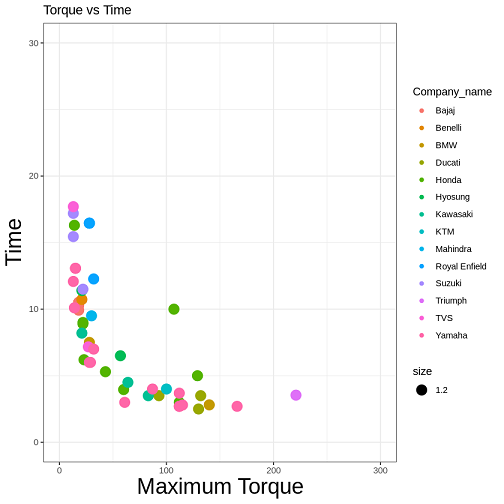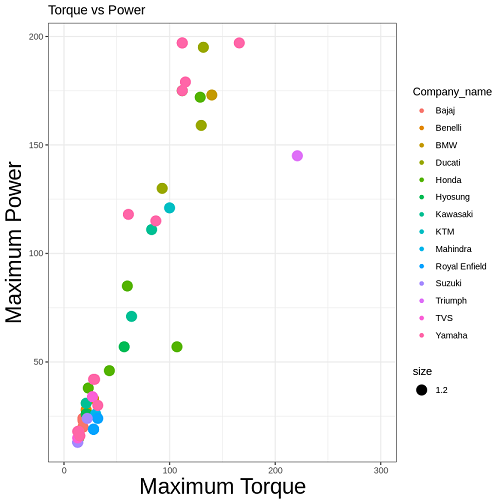

> India is the world's second largest producers of bikes and the market size is growing every year. In India, where public transport is not well developed, the Indian bike market continues to grow due to the advantage of having a private transportation option at a lower price than a private vehicle.<br>
<br>
This report aims to provide information on bike performance to Indian bike manufacturers who are aiming to enter overseas markets. To enter the San Francisco market, where Indian population is growing, the manufacturer asked for a performance analysis of the bike to fit the hilly San Francisco.<br>
<br>
The bike performance was largely analyzed with torque, engine capacity, horsepowermaximumpower, and factors that affect it. If torque is the direct force an engine can deliver, engine capacity is a measure of the engine's size and capabilities. And horespower can be seen as telling the rotational performance of how much the engine can perform. When the basic power is needed to start or accelerate a bike, the property of torque is used and the horsepower is used in high speed driving.<br>
<br>
Torque is the force that turns the axle, that is, the force that rotates the bike's tires. High torque is required when starting the vechicle or when going uphill. A bike with good torque accelerates faster and can climb hills better. The reason for using the maximum torque here is that the torque value is not alwasy constant, but gradually increases and then decreases, so the word maximum is used.<br>
<br>
Under the characteristics that a bike with good torque can start quickly and climb hills easeily, we would like to provide information on the performance for the hilly San Francisco with a focus on torque. The higher the torque, the better the instantaneous acceleration performance. Therefore, when rapid acceleration to climb a slope is needed, driving using the maximum torque will be of great help. <br>
<br>
Torque and engine capacity have a positive correlation, but they have a weak linear relationship, confirming that the two variables are not significantly influnced by each other. On the other hand, through the correlation between torque and power, it was confirmed that the higher the torque, the higher the power. As a result of multiple linear regression, it was confirmed that power is greatly affected by the correlation between engine and acceleration.<br>
<br>
The model with the highest coefficient of determination in simple linear regression was power and acceleration. The change in power explains 83.15% of the increase in acceleration required when climbing a hill, and through this, it can be inferred that both variables are related to torque.

> The following is a density graph showing the torque retention value by manufacturer. It shows that the maximum torque values of manufacturers are diversly distributed. Based on this, it can be seen that the differences in torque related to performance of the bike is exsited even from the same manufacturer.

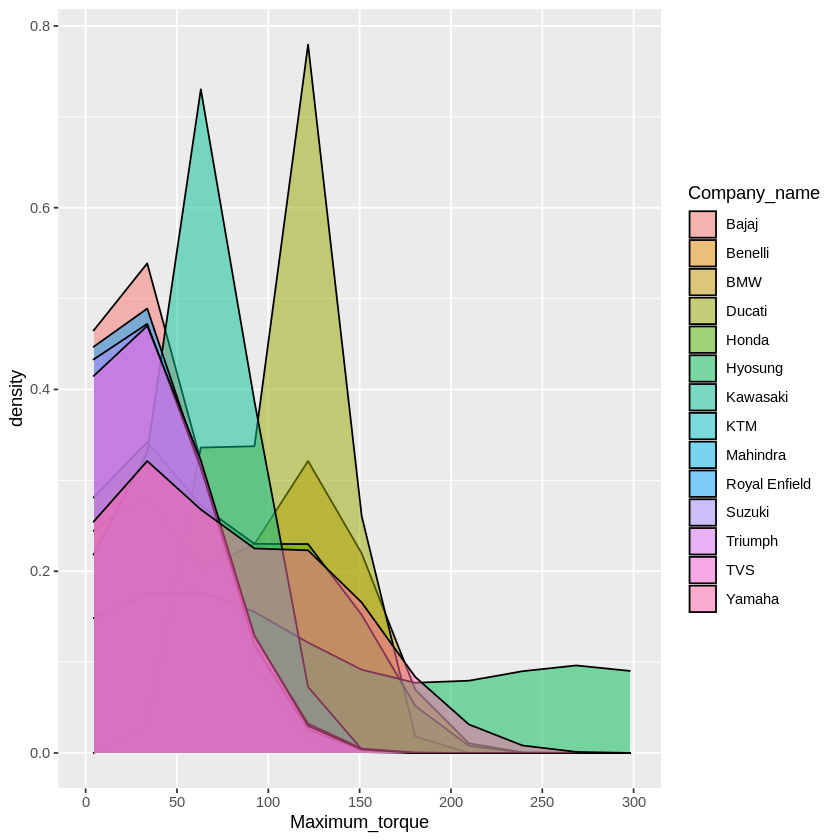

In [ ]:
ggplot(final_bike, aes(x=Maximum_torque, fill=Company_name)) +
scale_x_binned(limits = c(0,300)) +
geom_density(alpha=0.5, scale=1)
defaultW <- getOption("warn")
options(warn=-1)

> [The high grade hill of San Francisco is about 41%.](https://www.google.com/search?q=highest+grade+hill+san+francisco&oq=highest+grade+hill+in+san+fr&aqs=chrome.1.69i57j0i22i30j0i390l4.8469j0j7&sourceid=chrome&ie=UTF-8) The amount of torque needed to climb up the hill is "Force = mass x gravity x sin(arctan(grade))" and the force is used to find the torque as "Torque = Force x Wheelbase". The gravitational constant is 9.8 m/s^2 and we calculated [sin(arctan(grade))](https://www.google.com/search?q=sin%28arctan%280.41%29%29&bih=951&biw=1538&hl=en&ei=sQI1Y6qNEJmH0PEP6_6cyA8&ved=0ahUKEwjqqdWC-rj6AhWZAzQIHWs_B_kQ4dUDCA4&uact=5&oq=sin%28arctan%280.41%29%29&gs_lcp=Cgdnd3Mtd2l6EAM6CggAEEcQ1gQQsAM6BggAEB4QDzoICAAQHhAIEAo6BQgAEIYDSgQIQRgASgQIRhgAUOktWI8zYMY7aAFwAXgAgAF7iAGkA5IBAzEuM5gBAKABAcgBCMABAQ&sclient=gws-wiz). We found the values of force and torque for each and every bike and compared those torque values with the maximum torque given in the existing data set. The condition that the engine capacity must be larger than 250cc is added. A bike that satisfies the conditional expression is Kawasaki bike. This bike have the capability to go climb up through any steep hill in San Francisco and is useful for exploring the city.<br>
<br>
It is true that many people look at performance when buying a bike. San Francisco is famouns for its hills. Those who want to buy a bike in San Francisco will naturally want to buy a bike that is useful even on a slope. In order for manufacturers to enter a new market, they need to understand the psychology of these consumers and manufature bikes. By analyzing the torque among the performances of the bike, it was confirmed that the greater the torque, the better the power, and the faster the acceleration. This means that the instantaneous acceleration and power required for climbing a hill are greatly affected by torque. Based on this, we selected bike with torque suitable for the slope of the city from the list of existing bikes. We propose Eksca Corporation to enter the bike market in San Francisco by manufacturing a bike focusing on the performance of the bike below.

In [ ]:
report_bike <- data.frame(final_bike)
nrow(report_bike)
i<-1
sin_value <-0.38
g <- 9.8
for(i in final_bike){
    f<-0
    t<-0
    f <- (final_bike$Weight[i]+80)*(sin_value)*(g)
    t<-(f)*(final_bike$Wheel_base[i]/2000)
    ifelse(t > final_bike$Maximum_torque[i], report_bike <- report_bike[-c(i),],report_bike[c(i),])
}
final_report_bike<-data.frame()
i<-1
while(i <= nrow(report_bike)){
  if(report_bike$Engine_capacity[i] > 250 ){
    final_report_bike <- rbind(final_report_bike,report_bike[i,])
    }
    i<-i+1
    }
final_report_bike

[1] 52

,Company_name,Maximum_power,Maximum_torque,Bore,Stroke,Time,Wheel_base,Weight,Engine_capacity,Maximum_hp,Acceleration
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
389,Kawasaki,71,64,83,60,4.5,1410,204,324.64,10.08,80000
